   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

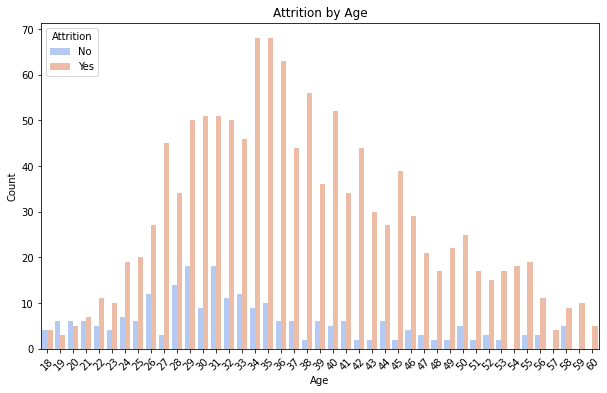

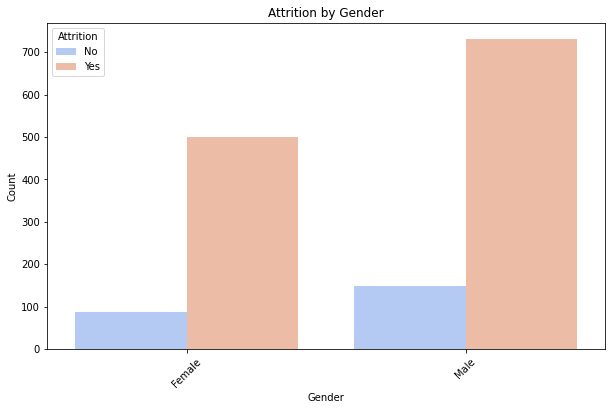

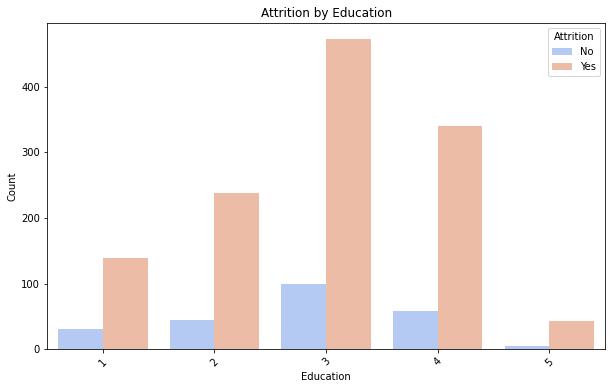

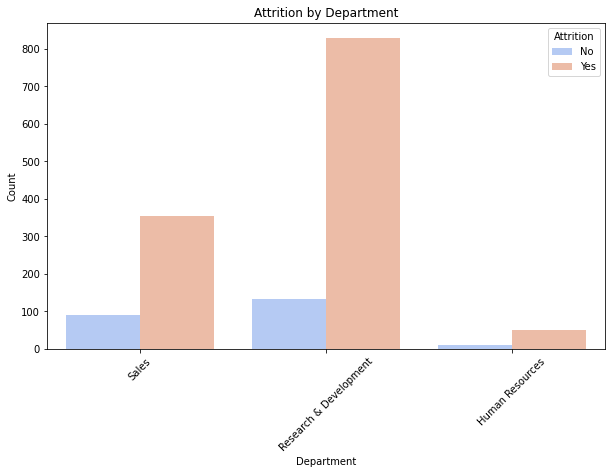

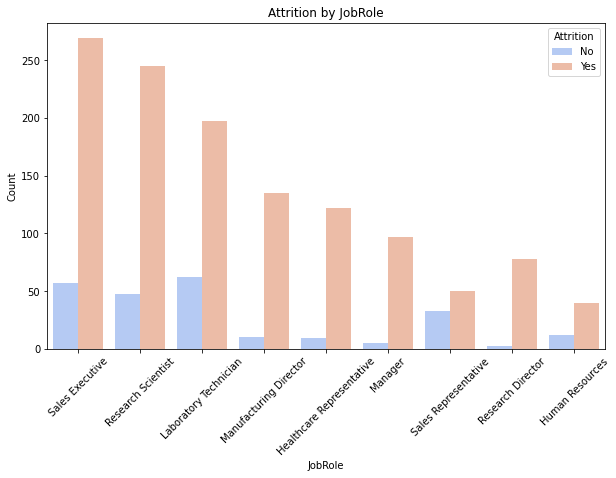

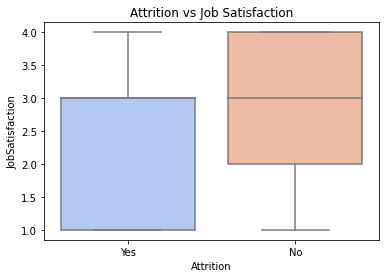

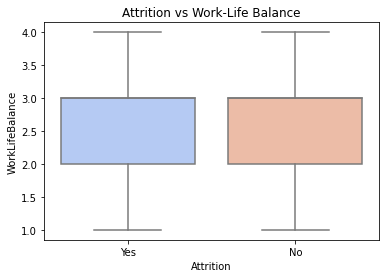

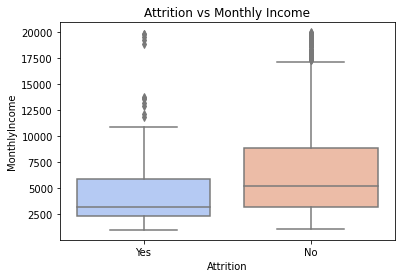

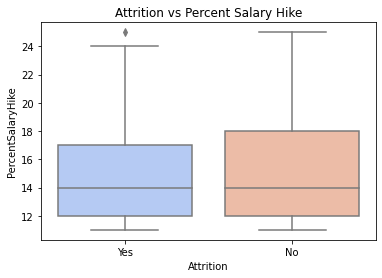

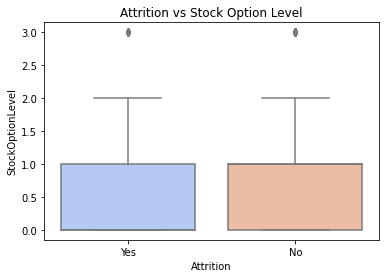

C:\Users\Dell\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


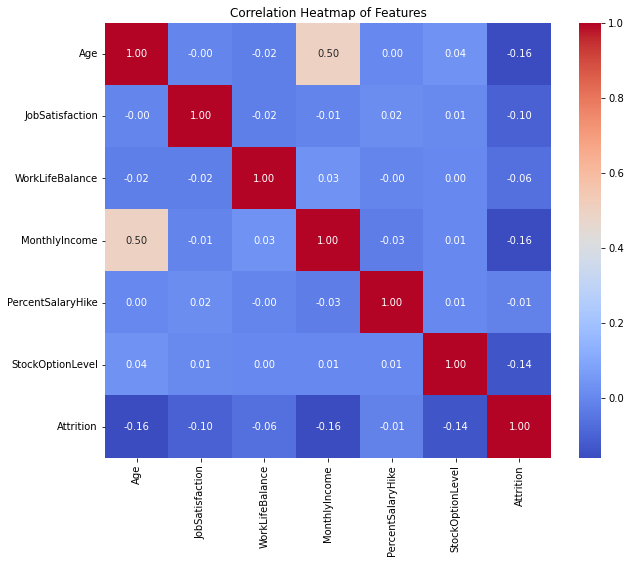

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'WA_Fn-UseC_-HR-Employee-Attrition (1).csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Objective 1: Understand Current Turnover Rates
# Calculate overall attrition rate
attrition_rate = data['Attrition'].value_counts(normalize=True) * 100
print("Overall Attrition Rate:")
print(attrition_rate)

# Analyze demographic distribution of attrition
# Create a function to visualize categorical distributions
def attrition_by_category(category):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=category, hue='Attrition', palette='coolwarm')
    plt.title(f'Attrition by {category}')
    plt.xlabel(category)
    plt.ylabel('Count')
    plt.legend(title='Attrition', labels=['No', 'Yes'])
    plt.xticks(rotation=45)
    plt.show()

# Demographic categories to analyze
demographics = ['Age', 'Gender', 'Education', 'Department', 'JobRole']
for category in demographics:
    attrition_by_category(category)

# Objective 2: Identify Key Factors Influencing Turnover
# Analyzing job satisfaction indicators
sns.boxplot(data=data, x='Attrition', y='JobSatisfaction', palette='coolwarm')
plt.title('Attrition vs Job Satisfaction')
plt.show()

sns.boxplot(data=data, x='Attrition', y='WorkLifeBalance', palette='coolwarm')
plt.title('Attrition vs Work-Life Balance')
plt.show()

# Analyzing salary factors
sns.boxplot(data=data, x='Attrition', y='MonthlyIncome', palette='coolwarm')
plt.title('Attrition vs Monthly Income')
plt.show()

sns.boxplot(data=data, x='Attrition', y='PercentSalaryHike', palette='coolwarm')
plt.title('Attrition vs Percent Salary Hike')
plt.show()

# Analyzing benefit factors
sns.boxplot(data=data, x='Attrition', y='StockOptionLevel', palette='coolwarm')
plt.title('Attrition vs Stock Option Level')
plt.show()

# Correlation heatmap for numerical factors
numerical_features = ['Age', 'JobSatisfaction', 'WorkLifeBalance', 'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel']
correlation_data = data[numerical_features + ['Attrition']]
correlation_data['Attrition'] = correlation_data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()
